# Exercise 3

In this exercise, you will simulate an experiment designed to measure the lifetime of an unstable particle X.  A beam of X particles is produced with a known average momentum and injected into a vacuum chamber.  Each X particle will travel some distance into the chamber before decaying at the "decay vertex", $\textbf{r}_{vtx}$.  The charged daughter particle is then detected by four tracking stations, located at various distances ($z_{stn}$) along the beam line.  Each tracking station measures the position where the track hits the station, $\textbf{r}_{hit}$.

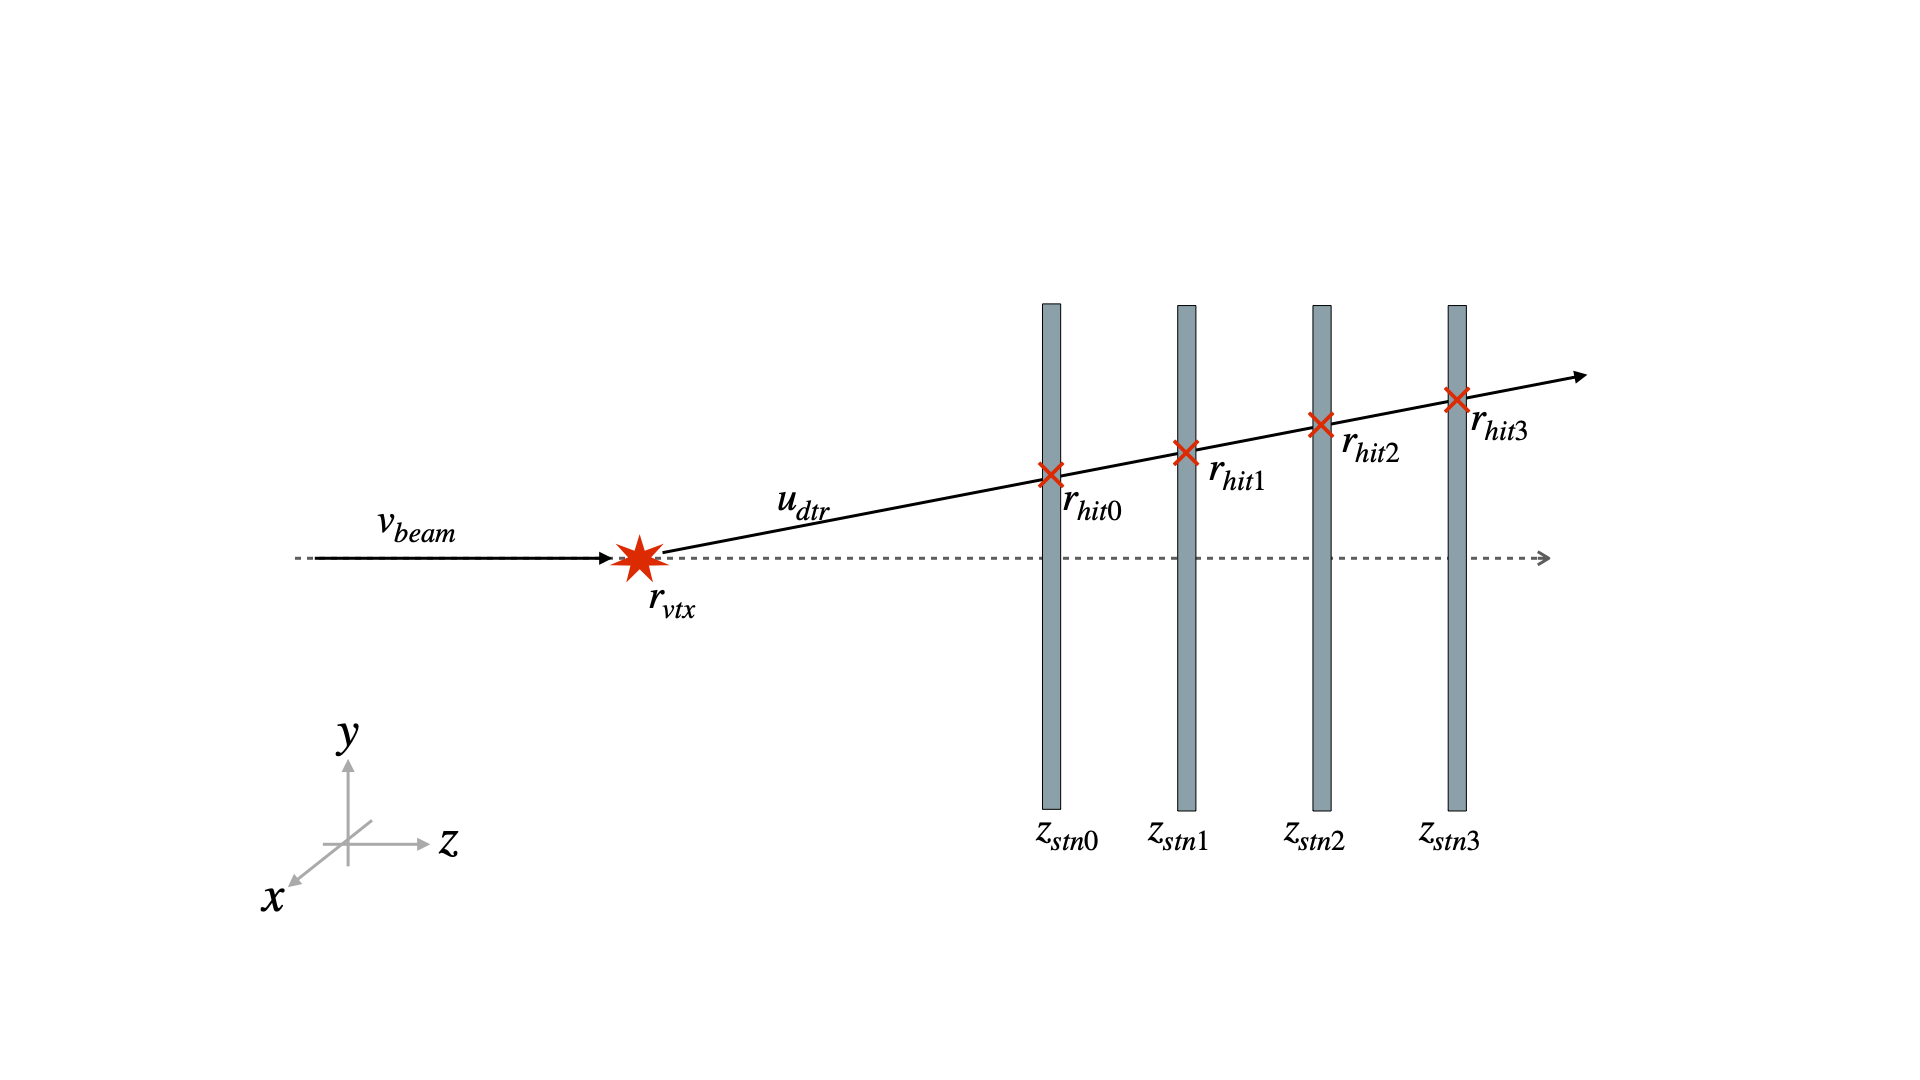

The coordinate system used is shown in the diagram, where the beam is produced at the origin and the average beam momentum is in the $z$-direction.

You will simulate the production and decay of particle X, as well as detection of its daughter particle. Each part of the exercise below deals with a different part of the experiment, for which you will generate random numbers with a specified distribution.  You will then verify the desired distribution is indeed produced - here a qualitative assessment is adequate, but a quantitative one is preferrable.

Use of simulation allows you to study the impact of different experimental choices, and your code should be capable of running with an arbitrary set of parameters. However, you can assume the initial set of parameters below : 
   * X mean lifetime, $\tau = 2.5 {\rm ms}$
   * Mean X velocity, $\mu_v = 2000 {\rm ms}^{-1}$
   * Std dev X velocity, $\sigma_v = 50 {\rm ms}^{-1}$
   * Tracking station positions, $z_{stn} = 30, 35, 40, 45 {\rm m}$
   * Tracking hit resolution, $\sigma_{rx, ry} = 0.01 {\rm m}$

It is strongly recommended that you use 3D vectors throughout the exercises, using numpy arrays, and numpy functions for vector algebra.

**Extensions**

A variety of extensions are possible to this exercise, drawing on some of the topics already covered in the unit. A few ideas are given below.  Please discuss any extension with the unit director before starting work.
   * Reconstructing the vertex location from the hit positions
   * Extracting the lifetime of the X particle from reconstructed vertex positions
   * Optimal placement of tracking stations


**Remember**
   * You are expected to use numpy and scipy libraries where appropriate.  
   * You should run each cell in order from the top of the notebook; there is no need to repeat code between cells
   * Use the "refresh kernel" button to reset everything and start again
   * Make sure your notebook runs fully & without errors, from a fresh kernel, before submitting it

## Part 1 - Beam Generation

First, you should simulate the production of X particles in the beam.  Each particle in the beam will have a velocity in the z-direction, that is drawn from a normal distribution with mean $\mu_{pz}$ and standard deviation $\sigma_{pz}$.  The particle should decay after a time that is drawn from an exponential distribution with mean lifetime $\tau$.  Given the velocity and the decay time, the decay position in the lab frame can then be calculated.  You can assume the beam is non-relativistic.

In the cell below, write functions to simulate the beam velocity, the decay time, and the decay vertex.

- [n/a] ~~calculate time step size then calculate how many time steps for each tau~~
- [n/a] ~~need better way to calculate timestep consistently or set as constant~~
- [n/a] ~~normalise tau using t/tau_(max)?~~
- [n/a] ~~find how many timesteps needed per particle then generate time evolution arrays~~
- [x] set up a n * 3 * 6 vector matrix with n (3 rows * 6 columns matrices) for posisition storage?
- [ ] add randomly generated seed to initial variables?
- [x] count no. particles which miss the detectors
- [x] define functions for plotting normal and exponential distributions
- [ ] fix exponential fits
- [x] check unit consistency
- Smearing:
    - [ ] use smeared or unsmeared data for final impact determination?
    - [ ] is smearing the reason the detector colour plots are skewed off centre?
    - [ ] work out probability of particle being detected by detector despite semaring, I'm assuming the detector would measure if it hit regardless of if there was uncertainty
- [ ] graph all particles regardless of travel direction
    - Particles shoot past the detectors when traveling fast and decay behind, hence the weird plotting
        - [ ] Add alternative computing path which uses different x positions if decay vertex behind detectors?
        or
        - [ ] calculate speed after which the decay vertex distribution begins occurring significantly behind the first detector
    - [ ] Check if the particles are travelling forward and if not plot a standard z distance away
- [ ] is the pathing in the smeared data a product of the smearing? plot both data sets and compare?
- [ ] add the 3d histograms to the plotting loop
- [ ] bins based on no. particles? maybe 1% 10000 ---> 100?
- [ ] for vert function return (n,3) not (n) shape array for generality?
- [ ] make sure function plotting doesn't use cheaty slicing to match sizes - Check sizes being entered to and returning from functions
- [ ] Check vectors and conservation of momentum


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

def bv(mu, sig, n):
    '''Set initial particle velocities using Normal probability distribution
        mu - Mean velocity (m s^-1)
        sig - Standard deviation of velocity (m s^-1)
        n - no. particles to be initialised
        
        returns: 
        vel - 2d (n,3) numpy array of initial velocity vectors with format (0, 0, z velocity)'''

    vel = np.zeros((n,3))
    vel[:,-1] = np.random.normal(mu, sig, n)
    return vel

def decay(n, tau_mean):
    '''Set decay time with an exponential probability distribution
        n - no. particles
        tau_mean - Mean particle lifetime to decay

        returns:
        1d numpy array of decay times with length n 
        '''

    return np.random.exponential(tau_mean, n)

def vert(vel, tau):
    '''Determine position of particle decay
        vel - initial velocity vectors, size (n,3)
        tau - decay time array, size (n)
        
        Returns:
        1d numpy array containing z axis decay position'''
    
    return vel[:, -1] * tau[:]

def norm_fit(m, s, bins):
    '''Normal distribution function for fitting to normal distribution histograms
        m - Mean velocity (m s^-1)
        s - Standard deviation of velocity (m s^-1)
        bins - no. bins used for histogram
        
        Returns:
        1d array of normal distribution y values corresponding to the histogram bins'''
    
    return 1/(s * np.sqrt(2 * np.pi)) * np.exp( - 0.5 * ((bins - m) / s)**2)

def exp_fit(t, centres):
    '''Exponential distribution function for fitting to exponential distribution histograms
        t - Mean decay time (s)
        centres - 1d numpy array containing histogram bin centres
        
        Returns:
        1d array of exponential distribution y values corresponding to the histogram bins'''

    return (1/ t) * np.exp(- (centres/t))

def sqr_dtctr(r):
    '''Generate square detectors
        r - half side length
        
        Returns:
        detector - numpy array containing corner values for a 2d planar square detector
        area - the surface area of the detector'''

    detector = np.array([[-r, -r, r, r, -r],
                         [-r, r, r, -r, -r]])

    return detector, (2 * r)**2

def rnd_dtctr(r):
    '''Generate round detectors
        r - detector radius
        
        Returns:
        x, y - numpy arrays containing coordinates for plotting 2d planar circular detectors
        - Surface area of detectors'''

    theta = np.linspace(0, 2 * np.pi)
    
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    
    return x, y, (np.pi * r**2)

'''------------------------------------Script------------------------------------'''

'''Variables'''
mu = 2000 #Initial particle velocity mean
sig = 50 #Initial particle velocity standard deviation
tau_mean = 2.5e-3 #mean particle decay time
n = 10000 #Number of particles for simulation
tracksig = 0.01 #Particle detector uncertainty

stn = np.arange(30, 50, 5)#[30, 35, 40, 45, 50, 55, 60] #Tracking station locations
detsize = 50 # Detector size +- from centre (or circular detector radius) ie: 50m --> 10000m^2 square detector (or ~7850m^2 round detector)
stations = len(stn) #no. stations
pos = np.zeros((n, 3, 2 + stations)) #Array for position vector storage

plot_3d = 'on' #Plot in 3D - 'on' or 'off'. Computationally intensive above 10000 particles

In the next cell, test your functions, and verify that they have the desired distributions.

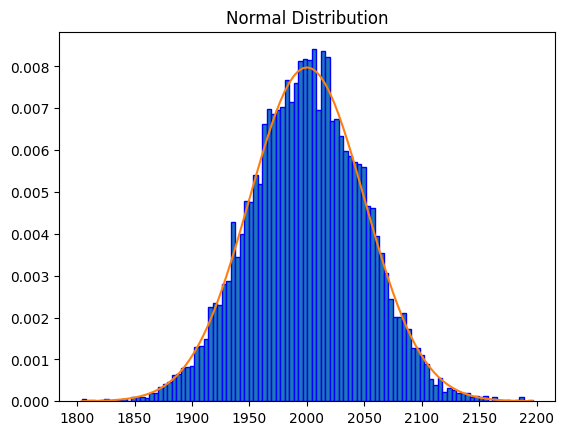

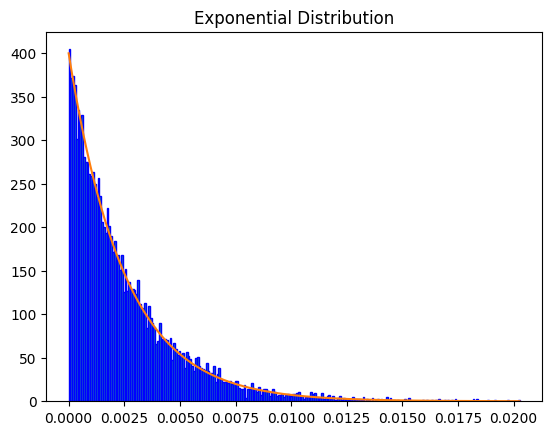

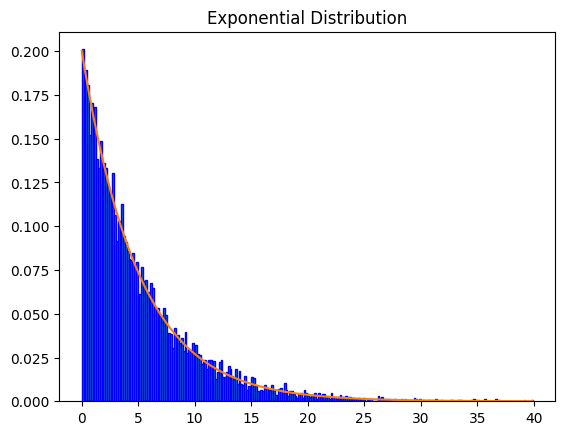

In [2]:
def prob_plotter(ptype, l_arr, num_bins, *prob_vars):
    '''Plot histograms of particle property distributions
        ptype - 
        l_arr - 
        num_bins - 
        *prob vars - 
        
        Returns:
        Histograms of the distribution of entered values with probability distribution fitting'''

    fig, ax = plt.subplots()

    count, bins, ignored = ax.hist(l_arr, num_bins, edgecolor='blue', density=True) 
    
    centres = bins

    if ptype == 0:
        fit = norm_fit(prob_vars[0], prob_vars[1], bins)
        plt.title("Normal Distribution")

    elif ptype == 1:
        fit = exp_fit(prob_vars[0], centres)
        plt.title("Exponential Distribution")
        
    ax.plot(centres, fit)
    plt.show()  

'''----------------------------------------------------------------------'''
vel = bv(mu, sig, n)
tau = decay(n, tau_mean)
vertices = vert(vel, tau)

pos[:, 2, 1] = vertices

bin0 = 100
bin1 = 250
bin2 = 250

prob_plotter(0, vel[:,-1], bin0, mu, sig)
prob_plotter(1, tau, bin1, tau_mean)
prob_plotter(1, vertices, bin2, tau_mean*mu)

## Part 2 - Daughter Particle

Now simulate the direction of the decay product, which should be _isotropic_ in the rest frame of the beam particle. This is the same as generating points on the surface of a unit sphere, with uniform probability over the solid angle $r\Omega$. This can be achieved in spherical coordinates, by generating the two angles, $\phi$ and $\theta$.  These should not have uniform distributions, since the area element is given by :

$${\rm r}\Omega = \sin(\theta) {\rm r}\phi {\rm r}\theta$$

To obtain uniform probability over the sphere, you should generate $\phi$ with a uniform distribution between $0$ and $2\pi$, and $\theta$ with a distribution proportional to $\sin \theta$.

**Notes**
   * we will assume the direction in the lab frame is equivalent to the direction in the beam particle rest frame. This is a valid approximation, provided the daughter particle has much higher momentum than the beam particle.
   * we will assume the daughter moves in a straight line, which means we do not need to compute its momentum, ie. the direction vector is a unit vector.

In [3]:
def daughter(n):
    '''Set daughter particle distribution
        n - no. particles
        
        Returns:
        u - 2d numpy array with shape (n,3) of direction vectors for daughter particles
        phi - 1d numpy array length n containing azimuthal decay angle 
        theta - 1d numpy array length n containing polar decay angle'''
    
    rng = np.random.default_rng()
    phi = (2*np.pi)*rng.random(n)
    theta = np.arccos(1-2*rng.random(n))

    u = np.zeros((n, 3, 2))

    u[:, 0, 1] = np.cos(phi) * np.sin(theta)
    u[:, 1, 1] = np.sin(phi) * np.sin(theta)
    u[:, 2, 1] = np.cos(theta)
    
    return u[:, :, 1], phi, theta

u, phi, theta = daughter(n)

As for Part 1, in the next cell, test your functions and verify the desired distributions are produced.

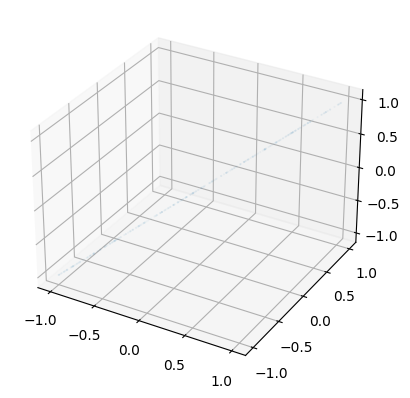

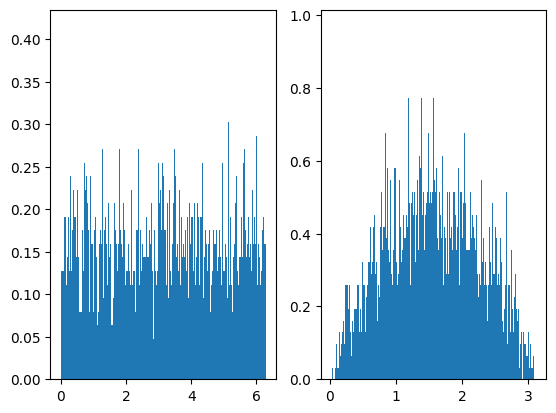

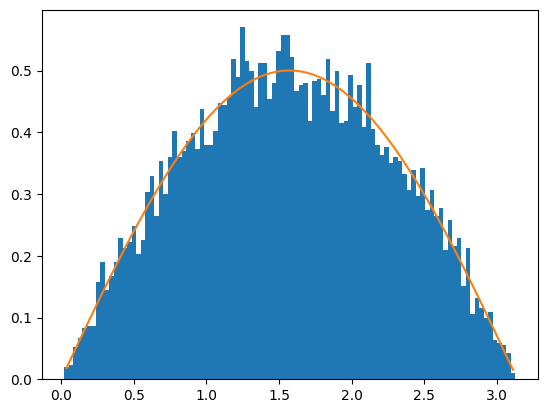

In [4]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(u[::100], u[::100], u[::100], s= 0.2, alpha = 0.05)

for i in range(0,n):
    ax.plot(u[i,::100], u[i,::100], u[i,::100], linewidth = 0.1, alpha = 0.2)
plt.show()


fig, ax = plt.subplots(1, 2)
ax[0].hist(phi, 1000, density=True)
ax[1].hist(theta, 1000, density=True)
plt.show()

'''Copied--------------------------------------------------------------'''
plt.figure()
count, bins, ignored = plt.hist(theta, 100, density=True)
bin_centres = (bins[1:] + bins[:-1])/2
plt.plot(bin_centres, np.sin(bin_centres)/2, label=r'$sin(\theta)$')
'''--------------------------------------------------------------------'''



plt.show()

## Part 3 - Propagation to Tracking Stations

The next step is to propagate the daughter particle to the tracking detectors. We can assume the particle takes a straight line path from the decay vertex. Since the tracking stations are at fixed values of $z$, the propagation is most easily performed by writing the path as two functions, giving the $x$ and $y$ coordinates as function of $z$ :

$$x(z) = m_x z + c_x$$
$$y(z) = m_y z + c_y$$

The gradients $m_x = \frac{dx}{dz}$ and $m_y = \frac{dy}{dz}$ can be computed directly from the components of the the daughter particle direction vector, $\textbf{u}_{dtr}$.

The intercepts $c_x$ and $c_y$, can then be found by solving the straight line equations given the $(x,y,z)$ coordinates of the decay vertex, $\textbf{r}_{vtx}$.

In [5]:
def path(u, pos, stations):
    '''Calculate decay path equation parameters
    u - numpy array containing decay direction vectors
    
    Returns:
    pos - the updated postion array with (x, y, z) coordinates for particles at each detector
    '''
    mx = u[:,0]/u[:,2]
    my = u[:,1]/u[:,2]

    cx = u[:, 0] - mx
    cy = u[:, 1] - my
    print(u[:, 0])
    print(cx)
    for i in range(2, stations + 2):
        pos[:,:,i] = np.transpose(np.array((mx * stn[i-2] + cx,
                                             my * stn[i - 2] + cy,
                                              np.full(n, stn[i - 2]))))
        
    #print([pos[i] for i in range(len(pos)) if mx[i] or my[i] <= 0])
    return pos

pos = path(u, pos, stations)

[-0.98943523 -0.88250251  0.65106477 ...  0.22983873  0.64318535
 -0.06258806]
[ -9.4929792  -72.69990611   2.07210401 ...  -2.37806948  -1.63865386
  -0.13232523]


In the next cell, test your track propagation functions. (A qualitative assessment is acceptable here).

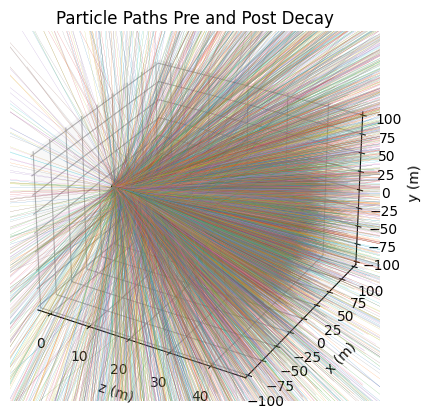

In [6]:
if n <= 10000:
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    ax.set_ylim(-100,100)
    ax.set_zlim(-100,100)

    xx, yy = np.meshgrid((np.amin(pos[:,0,:]),np.amax(pos[:,0,:])),
                        (np.amin(pos[:,1,:]) ,np.amax(pos[:,1,:])))

    for i in range(0, 4):
        ax.plot_surface(np.full((2,2),stn[i]), xx, yy, alpha=0.2)

    for i in range(0,n):
        ax.plot(pos[i,2,:], pos[i,0,:], pos[i,1,:], linewidth = 0.1)
        
    plt.title('Particle Paths Pre and Post Decay')
    ax.set_xlabel('z (m)')
    ax.set_ylabel('x (m)')
    ax.set_zlabel('y (m)')
    plt.show()

## Part 4 - Hit Smearing

The tracking detectors are not perfect, and will measure position with finite resolution.  This can be simulated by adding offsets (in x and y directions) to the true hit position, where the offsets are drawn from a normal distribution with a mean of zero and a standard deviation equal to the resolution of the detector.  This process is known as smearing.

You should write a function which takes the true hit positions and smears them according to the detector resolution, to produce the reconstructed (or measured) hit positions.

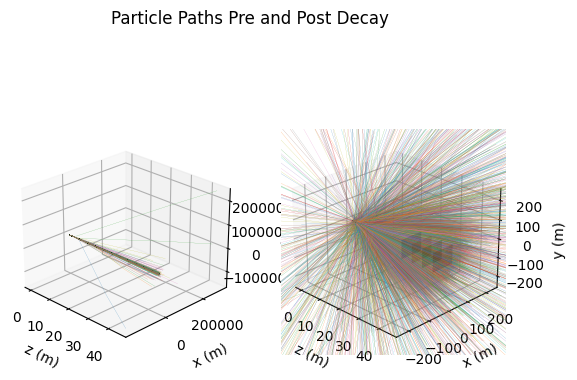

In [7]:
def smearing(p0):
    ''''''
    p = np.copy(p0) # Avoid overwriting position array
    p[:,:2,2:] = p[:,:2,2:] + np.random.normal(0, tracksig, (n, 2, stations))

    return p

pos_s = smearing(pos)

'''-----------------------------------------------------'''
if n <= 10000:
    fig, ax = plt.subplots(1,2,subplot_kw={"projection": "3d"})

    xx, yy = np.meshgrid((np.amin(pos_s[:,0,:]),np.amax(pos_s[:,0,:])),
                        (np.amin(pos_s[:,1,:]) ,np.amax(pos_s[:,1,:])))

    xx2, yy2 = np.meshgrid((-detsize, detsize),
                        (-detsize, detsize))

    for i in range(0, stations):
        ax[0].plot_surface(np.full((2,2),stn[i]), xx2, yy2, alpha=0.2)

    for i in range(0,n):
        ax[0].plot(pos_s[i,2,:], pos_s[i,0,:], pos_s[i,1,:], linewidth = 0.1)
        ax[0].view_init(45,45)
    
    ax[1].set_ylim(-5 * detsize, 5 * detsize)
    ax[1].set_zlim(-5 * detsize, 5 * detsize)

    for i in range(0, stations):
        ax[1].plot_surface(np.full((2,2),stn[i]), xx2, yy2, alpha=0.2)

    for i in range(0,n):
        ax[1].plot(pos_s[i,2,:], pos_s[i,0,:], pos_s[i,1,:], linewidth = 0.1)

    fig.suptitle('Particle Paths Pre and Post Decay')
    for i in range(2):
        ax[i].set_xlabel('z (m)')
        ax[i].set_ylabel('x (m)')
        ax[i].set_zlabel('y (m)')
        ax[i].view_init(25, -45)

Again, you should test your code to verify that the desired distributions are indeed produced.

'--------------------------------------------------------------------'

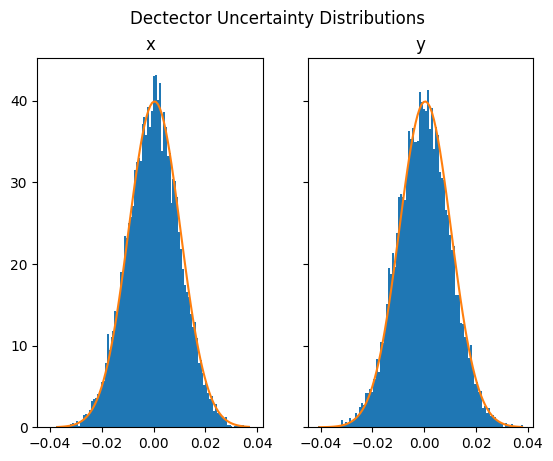

In [8]:
'''Copied--------------------------------------------------------------'''
fig, ax = plt.subplots(1, 2, sharex= True, sharey= True)
var = ('x', 'y')
for i in range(2):
    count, bins, ignored = ax[i].hist(pos_s[:,i,3] - pos[:,i,3], 100, density=True)
    bin_centres = (bins[1:] + bins[:-1])/2

    ax[i].plot(bin_centres, 1/(tracksig * np.sqrt(2 * np.pi)) *
                np.exp( - (bins[:-1] - 0)**2 / (tracksig**2)/2))
    
    ax[i].set_title(var[i])

plt.suptitle('Dectector Uncertainty Distributions')
'''--------------------------------------------------------------------'''

## Part 5 - Experiment Simulation

Now you are ready to simulate the full experiment.  You should produce a large sample of events.  For each event, generate a beam particle, a daughter particle, and finally the true and smeared hits.

Given a sample of events, it is possible to compute a range of parameter distributions that will inform the design of the experiment.  You should present at least the following distributions :
   * The number of hit tracking stations
   * The 2D (x,y) distribution of measured hits on each of the four stations

shape:  (4954,)
[[[  0.           0.           4.78280558   5.60182057   6.40407256
     7.20818148]
  [  0.           0.         -47.79721761 -55.86800216 -63.96485822
   -72.04200917]
  [  0.           4.66161352  30.          35.          40.
    45.        ]]

 [[  0.           0.         -16.73756226 -19.53446129 -22.34127486
   -25.13622122]
  [  0.           0.          -1.68661332  -1.96570078  -2.23188868
    -2.51746855]
  [  0.          11.08863146  30.          35.          40.
    45.        ]]

 [[  0.           0.         -13.67470093 -16.11459323 -18.54335324
   -20.97810788]
  [  0.           0.           1.3879888    1.65091124   1.89145486
     2.16849948]
  [  0.           9.21782601  30.          35.          40.
    45.        ]]

 ...

 [[  0.           0.           0.           0.           0.
     0.        ]
  [  0.           0.           0.           0.           0.
     0.        ]
  [  0.           0.           0.           0.           0.
     0.        ]]

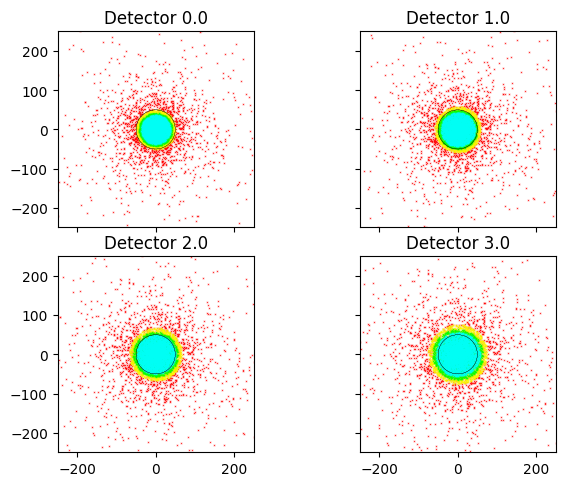

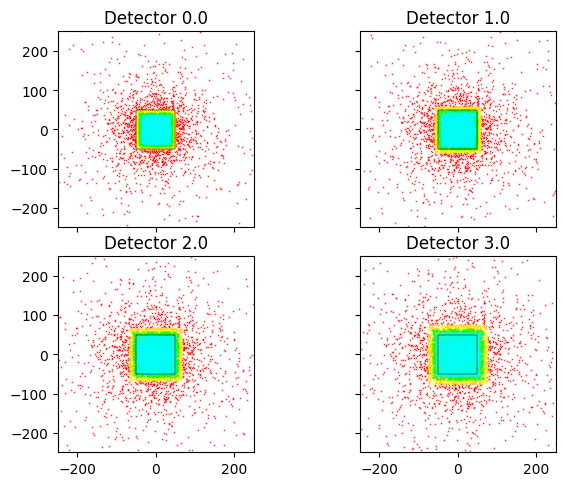

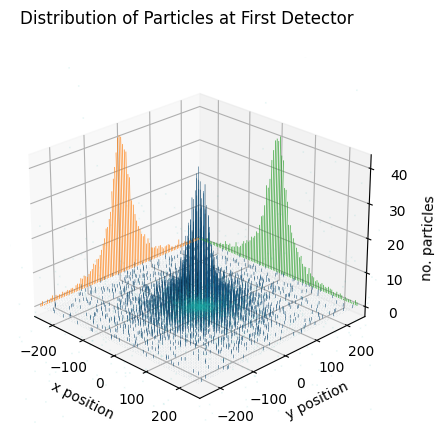

In [17]:

def experiment(pos_arr, r, shape, plot_3d):
    '''Calculate the detection rates from position array

    pos_arr - numpy array containing particle position vectors
    r - radius/half width of detectors
    shape - 'round' or 'square', choose detector shape
    plot_3d - 'on' to plot in 3d, intensive for particle numbers greater than 10000
    
    returns:
    area - The surface area of the detectors
    d_locs_lengths - numpy arrays containing the number of particle hits on each detector
    '''
    
    def hit_miss(pos_arr, pos, r, shape):
        '''determine particle detections
        pos_arr - position array
        pos - detector position
        r - radius/half width of detectors
        shape - 'round' or 'square', choose detector shape
        
        Returns:
        locs - array containing indexes of particles measured by detector
        len(locs) - length of locs'''

        if shape == 'square': # Determine no. particle hits for square detectors
            locs = [i for i in range(np.shape(pos_arr)[0])\
                        if np.all(np.abs(pos_arr[i, 0, pos]) < r)\
                        and np.all(np.abs(pos_arr[i, 1, pos]) < r)]
            
        elif shape == 'round': # Determine no. particle hits for round detectors
            locs = [i for i in range(0, np.shape(pos_arr)[0])\
                        if np.all((pos_arr[i,0,pos]**2 + pos_arr[i,1,pos]**2)**0.5 < r)]
        print('shape: ',np.shape(locs))
        return locs, len(locs)
        
    no_dets = np.shape(pos_arr)[2] - 2 # Determine the number of detectors 
    plot_store = np.empty((no_dets + 1, n, 3, 2 + stations)) #Initialise array for storing particles after sorting for detection, shape: (no. detectors + 1, position vector) with position vector (n,3,no.detectors + 2)
    d_locs_lengths = np.empty(no_dets)
    plot_store[0][:] = pos_arr

    for i in range(1, len(plot_store)):
        detection_locs, d_locs_lengths[i-1] = hit_miss(plot_store[0], i + 1, r, shape)
        plot_store[i, :int(d_locs_lengths[i-1])] = plot_store[0][detection_locs]
        print(plot_store[1, :])
        print(np.shape(detection_locs))
        #plot_store[0][detection_locs] = plot_store[0][detection_locs]
    
    if shape == 'square':
        detector, area = sqr_dtctr(detsize)
        x, y = detector[0], detector[1]
        
    elif shape == 'round':
        x, y, area = rnd_dtctr(r)

    print(shape,'detector hits:')
    [print('Detector {}: '.format(i + 1) + str(d_locs_lengths[i])) for i in range(no_dets)]

    no_dets
    u = np.arange(no_dets, step = 1)
    det_sqrt = np.ceil(np.sqrt(no_dets)).astype(int)
    s = np.zeros(det_sqrt**2)
    s[: u.size] = u
    s = s.reshape(det_sqrt, det_sqrt)

    rows = np.shape(s)[0]
    cols = np.shape(s)[1]

    if (no_dets % 2) == 0:
        fig, ax = plt.subplots(rows, cols, sharex=True, sharey=True)
        
    else:
        fig, ax = plt.subplots(rows, cols, sharex=True, sharey=True)
        plot_store = np.append(plot_store, np.zeros((no_dets + 1, n, 3, 3)), 3)

    fig.tight_layout()

    cm  = plt.cm.hsv #Colourmap
    colour = [cm(round(x*cm.N/(no_dets + 2))) for x in range(no_dets + 2)] #Array of colours for distinguishing particles
    
    p_range = 5 #choose display range as multiple of detector radius

    for row in range(rows):#Work through plots from left to right, top to bottom 
        for col in range(cols):
            for l in range(no_dets):
                ax[row, col].scatter(plot_store[l, :int(d_locs_lengths[l - 1]),0, 2 + s[row, col].astype(int)],
                                plot_store[l, :int(d_locs_lengths[l - 1]),1, 2 + s[row, col].astype(int)],
                                marker = 'x', s = 0.1, alpha = 0.8,
                                color = colour[l])
                
                ax[row, col].plot(x, y, color = 'black', linewidth= 0.1)
                ax[row, col].set_aspect('equal')
                ax[row, col].set_xlim(-p_range * r, p_range * r)
                ax[row, col].set_ylim(-p_range * r, p_range * r)
                ax[row, col].set_title('Detector '+ str(s[row, col]))

                if s[row, col] == no_dets:
                    print('BREAK')
                    break
                
    [fig.delaxes(ax[i, j]) for i in range(1, rows) for j in range(cols) if s[i, j].astype(int) == 0] #Delete unused subplots

    if plot_3d == 'on':    
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


        ax.scatter(plot_store[0, :int(d_locs_lengths[0 - 1]),0, 2 + s[0, 0].astype(int)],
                                        plot_store[0, :int(d_locs_lengths[0 - 1]),1, 2 + s[0, 0].astype(int)],
                                        marker = 'x', s = 0.1, alpha = 0.1,
                                        color = 'lightseagreen')

        hist, xedges, yedges = np.histogram2d(pos_s[:, 0, 3], pos_s[:, 1, 3], bins=100, range=[[-p_range * r, p_range * r], [-p_range * r, p_range * r]])

        xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
        xpos = xpos.ravel()
        ypos = ypos.ravel()
        zpos = 0

        dx = dy = 0.5 * np.ones_like(zpos)
        dz = hist.ravel()

        ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

        countx, binsx = np.histogram(pos_arr[:, 0, 3], 100, range=[-p_range * r, p_range * r], density=True)
        county, binsy = np.histogram(pos_arr[:, 1, 3], 100, range=[-p_range * r, p_range * r], density=True)

        ax.bar(binsx[:-1], countx * np.amax(dz)* 100, width= 2, zs=-p_range * r, zdir='x')
        ax.bar(binsy[:-1], county * np.amax(dz)* 100, width= 2, zs= p_range * r, zdir='y')

        ax.plot(x, y, color = 'black', linewidth= 0.1) #Plot detector

        ax.set_xlim(-p_range * r, p_range * r)
        ax.set_ylim(-p_range * r, p_range * r)
        ax.view_init(25,-45)
        
        fig.suptitle('Distribution of Particles at First Detector')
        ax.set_xlabel('x position')
        ax.set_ylabel('y position')
        ax.set_zlabel('no. particles')
                   
    return area, d_locs_lengths

rnd_area, rnd_detect = experiment(pos_s, detsize, 'round', plot_3d='off')
sqr_area, sqr_detect = experiment(pos_s, detsize, 'square', plot_3d='on')

area_diff = rnd_area/sqr_area * 100
detector_diff = np.divide(rnd_detect, sqr_detect) * 100

print('----------------------------\nArea Difference: ', area_diff, '%')
print('Detection Difference: ')
[print('Detector {}: '.format(i + 1), detector_diff[i],'%') for i in range(len(detector_diff))]

locs = [i for i in range(0, np.shape(pos_s)[0]) if np.all((pos_s[i,0,3]**2 + pos_s[i,1,3]**2)**0.5 < 5*detsize)]

pos_h = pos_s[locs]





In [10]:
mu = int(input('mean velocity: '))
sig = int(input('velocity standard deviation: '))
tau_mean = 2.5e-3
n = int(input('no. particles: '))
tracksig = 0.01

no_stns = int(input('Number of Detectors: '))
min_stn = int(input('Position of Closest Detector: '))
spacing = int(input('Detector Spacing: '))

stn = np.arange(min_stn, spacing * no_stns + min_stn, spacing)#Tracking station locations

detsize = 50 # Detector size +- from centre ie: 50m --> 100m^2 detector
stations = len(stn)
pos = np.zeros((n, 3, 2 + stations)) #Array for position vector storage

vel = bv(mu, sig, n)
tau = decay(n, tau_mean)
vertices = vert(vel, tau)

pos[:, 2, 1] = vertices

bin0 = 100
bin1 = 250
bin2 = 250

prob_plotter(0, vel[:,-1], bin0, mu, sig)
prob_plotter(1, tau, bin1, tau_mean)
prob_plotter(1, vertices, bin2, tau_mean*mu)

u, phi, theta = daughter(n)

pos = path(u)

for i in range(2, stations + 2):
    pos[:,:,i] = np.transpose(np.array((mx * stn[i-2] + cx, my * stn[i - 2] + cy, np.full(n, stn[i - 2]))))

pos_s = smearing(pos)

rnd_area, rnd_detect = experiment(pos_s, detsize, 'round', stations, plot_3d='off')
sqr_area, sqr_detect = experiment(pos_s, detsize, 'square', stations, plot_3d='on')

area_diff = rnd_area/sqr_area * 100
detector_diff = np.divide(rnd_detect, sqr_detect) * 100

print('----------------------------\nArea Difference: ', area_diff, '%')
print('Detection Difference: ')
[print('Detector {}: '.format(i + 1), detector_diff[i],'%') for i in range(len(detector_diff))]



ValueError: invalid literal for int() with base 10: ''

## Part 6 - Summary

In the Markdown cell below, describe how your code solves the problem set. State any equations used in the solution and how they were obtained. Include your reasons for any libraries you used, as well as any particular programming techniques. Explain your choice of any test cases. Finally, state any salient features of the results you obtained. You are not expected to write more than about 400-500 words.

- Smearing leads to "zigzag" paths